# Machine Learning - Linear Regression

### Model

In [2]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#there is but an index problem, so we can fix it:
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


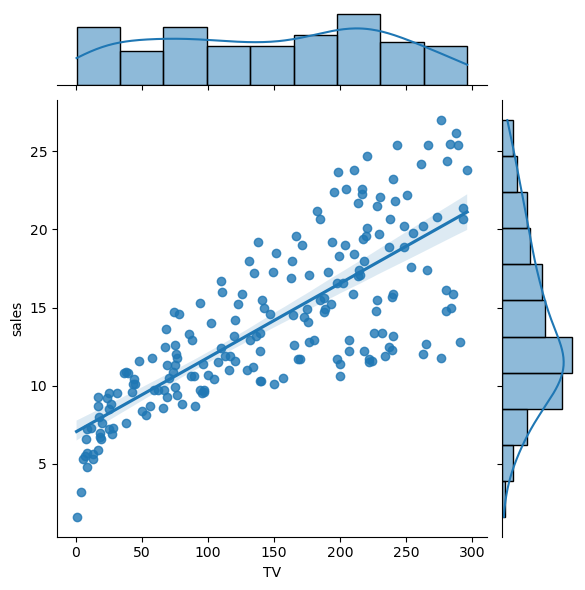

In [6]:
import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [7]:
from sklearn.linear_model import LinearRegression

In [15]:
X = df[["TV"]] #lets do "TV" independent

In [16]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [17]:
y = df[["sales"]]

In [18]:
reg = LinearRegression()

In [19]:
model = reg.fit(X, y) #we are ftting now the linear regression

In [24]:
model # y = Beta-0 + (Beta-1 * X)

LinearRegression()

In [25]:
str(model)

'LinearRegression()'

In [26]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [27]:
model.intercept_ #it is our value of Beta-0

array([7.03259355])

In [28]:
model.coef_ #and it is the Beta-1

array([[0.04753664]])

In [31]:
#and the score of the model (r^2)
model.score(X,y)

0.611875050850071

### Predictive

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


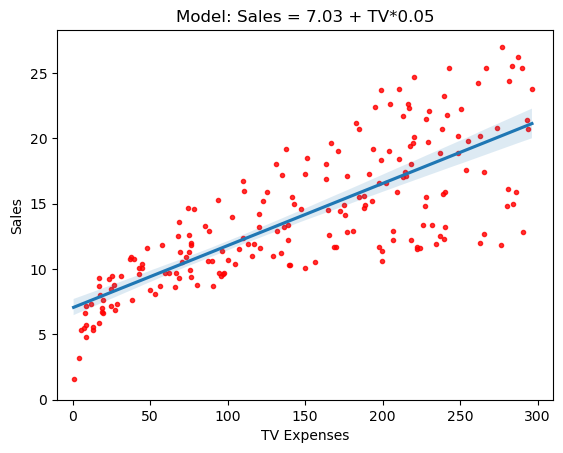

In [36]:
g = sns.regplot(x=df["TV"], y=df["sales"], scatter_kws={'color':'r', 's':9})
g.set_title("Model: Sales = 7.03 + TV*0.05")
g.set_ylabel("Sales")
g.set_xlabel("TV Expenses")
plt.xlim(-10,310)
plt.ylim(bottom=0);

Sales = 7.03 + 0.05*TV

In [37]:
#my chef is asking to me, how many Product can I sale if I give ads on TV for 165$? 
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [39]:
#it is the easier way:

model.predict([[165]])

/Users/cbarank/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [40]:
#what if we enter the 3 values:
new_data = [[5],[15],[30]]

In [42]:
model.predict(new_data)

/Users/cbarank/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

## Lets play with Residuum

**MSE: Mean Square Error**

**RMSE: Square Root Mean Square Error**

In [43]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [64]:
model.predict(X)[0:6] # the first 6 Elements

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [46]:
real_y = y[0:10]

Lets make a table

In [49]:
predicted_y = pd.DataFrame(model.predict(X)[0:10])

In [51]:
Residual = pd.concat([real_y, predicted_y], axis = 1)

In [54]:
Residual.columns = ["real_y","predicted_y"]

In [55]:
Residual

,real_y,predicted_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [59]:
Residual["Residual"] = Residual["real_y"] - Residual["predicted_y"]

In [65]:
Residual #We want to see it clearly with REsidual and MSE

,real_y,predicted_y,Residual,MSE
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [66]:
Residual["MSE"] = Residual["Residual"]**2

In [67]:
Residual

,real_y,predicted_y,Residual,MSE
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [70]:
import numpy as np
np.mean(Residual["MSE"])

9.290350329638105